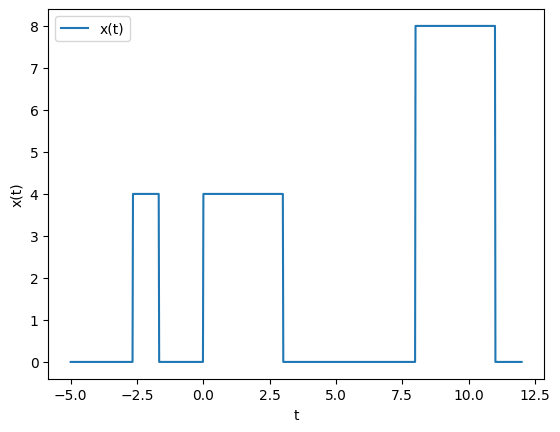

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a gate function with the given parameter
def gate_func(A, B):
    def output_func(t):
        return np.where((t >= 0) & (t <= A), B, 0)
    return output_func

# Transform a function. Parameter shifting is given by param_func(), and the value is multiplied by `times`
def func_transform(func, param_func, times):
    def output_func(x):
        return func(param_func(x)) * times
    return output_func

# Returns with a function whose output is the sum of the outputs of f and g
def add_func(f, g):
    def output_func(x):
        return f(x) + g(x)
    return output_func 
    

A = 3
B = 4
D = 8

g0 = gate_func(A, B)
g1 = func_transform(g0, lambda t: 3 * t + D, 1)
g2 = func_transform(g0, lambda t: t - D, 2)

x_func = add_func(add_func(g0, g1), g2)

x_values = np.linspace(-5, 12, 1000)
y_values = x_func(x_values)
plt.plot(x_values, y_values, label=f'x(t)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.show()
